In [2]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

## Loading Data

In [3]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Data Exploration


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
for col in df.columns:
  if df[col].dtype == 'object':
    dummies = pd.get_dummies(df[col], prefix=col) 
    df = df.join(dummies)

df = df.drop('ocean_proximity', axis=1)


In [8]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [9]:
from sklearn.model_selection import train_test_split

x = df.drop(["median_house_value"] , axis = 1)
y = df["median_house_value"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [11]:
train_data = x_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
13177,-117.78,33.97,2.0,556.0,63.0,179.0,54.0,8.4411,True,False,False,False,False,500001.0
14308,-117.13,32.71,37.0,1220.0,325.0,1472.0,323.0,1.8250,False,False,False,False,True,81500.0
11045,-117.83,33.81,24.0,3550.0,895.0,2828.0,834.0,2.8403,True,False,False,False,False,225600.0
16456,-121.27,38.12,44.0,2356.0,482.0,1043.0,443.0,2.4949,False,True,False,False,False,108000.0
3628,-118.44,34.24,35.0,2344.0,435.0,1531.0,399.0,3.7250,True,False,False,False,False,178200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9742,-121.60,36.81,18.0,1575.0,230.0,751.0,219.0,5.2203,True,False,False,False,False,286500.0
10121,-117.93,33.93,37.0,1128.0,273.0,931.0,234.0,2.8000,True,False,False,False,False,137500.0
2038,-119.69,36.74,17.0,2438.0,598.0,1563.0,538.0,1.5449,False,True,False,False,False,62500.0
387,-122.29,37.89,52.0,2248.0,422.0,870.0,377.0,3.4732,False,False,False,True,False,246200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

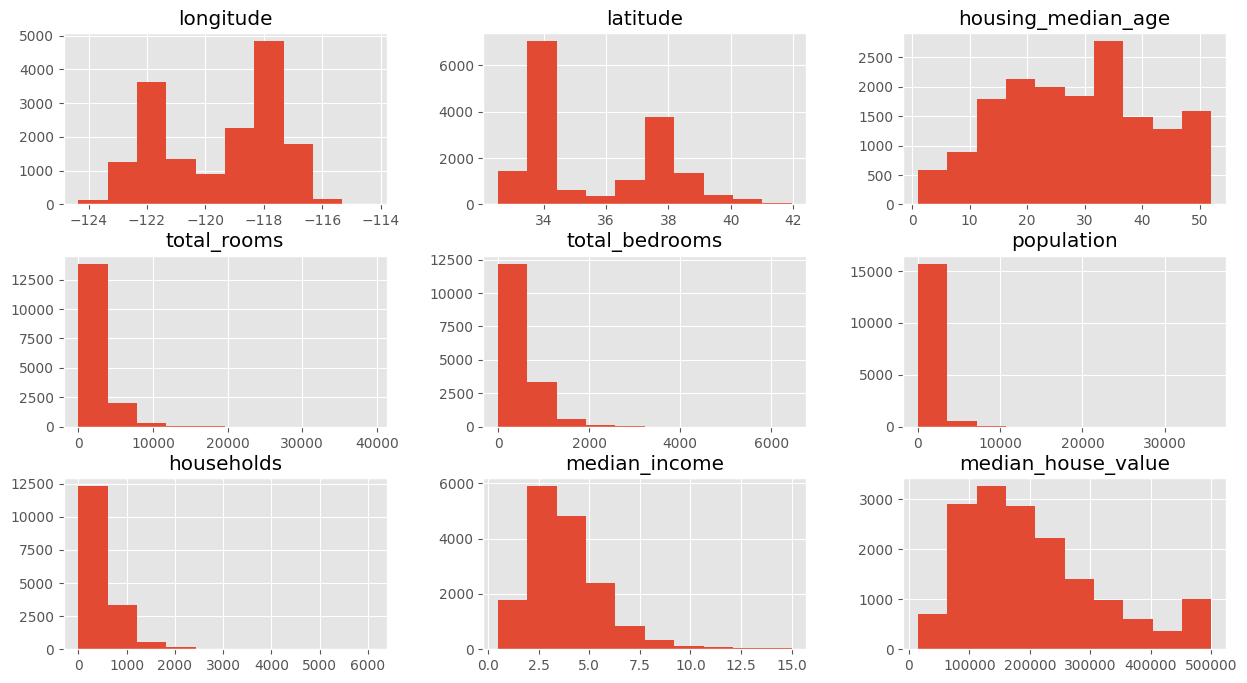

In [13]:
train_data.hist(figsize=(15,8))

In [14]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
longitude,1.000000,-0.923706,-0.109434,0.044909,0.068845,0.098064,0.054955,-0.022024,0.320010,-0.050397,0.008148,-0.477318,0.047086,-0.052504
latitude,-0.923706,1.000000,0.009030,-0.035856,-0.066214,-0.106280,-0.070287,-0.074659,-0.447660,0.349109,-0.014405,0.359209,-0.162786,-0.140648
housing_median_age,-0.109434,0.009030,1.000000,-0.361069,-0.319680,-0.293935,-0.301730,-0.116824,0.047435,-0.243546,0.007942,0.261538,0.021807,0.111909
total_rooms,0.044909,-0.035856,-0.361069,1.000000,0.930326,0.858014,0.919004,0.196093,-0.002109,0.027736,-0.009350,-0.024830,-0.011721,0.131263
total_bedrooms,0.068845,-0.066214,-0.319680,0.930326,1.000000,0.878305,0.980209,-0.006948,0.019666,-0.005236,-0.006608,-0.020350,-0.002338,0.050171
population,0.098064,-0.106280,-0.293935,0.858014,0.878305,1.000000,0.907414,0.003708,0.074227,-0.017418,-0.010913,-0.063128,-0.025625,-0.026099
households,0.054955,-0.070287,-0.301730,0.919004,0.980209,0.907414,1.000000,0.013603,0.042896,-0.036481,-0.009833,-0.011831,-0.001110,0.064891
median_income,-0.022024,-0.074659,-0.116824,0.196093,-0.006948,0.003708,0.013603,1.000000,0.169105,-0.239645,-0.009788,0.062117,0.025325,0.684164
ocean_proximity_<1H OCEAN,0.320010,-0.447660,0.047435,-0.002109,0.019666,0.074227,0.042896,0.169105,1.000000,-0.606734,-0.011954,-0.314815,-0.338200,0.258997
ocean_proximity_INLAND,-0.050397,0.349109,-0.243546,0.027736,-0.005236,-0.017418,-0.036481,-0.239645,-0.606734,1.000000,-0.009317,-0.245361,-0.263588,-0.489090


<Axes: >

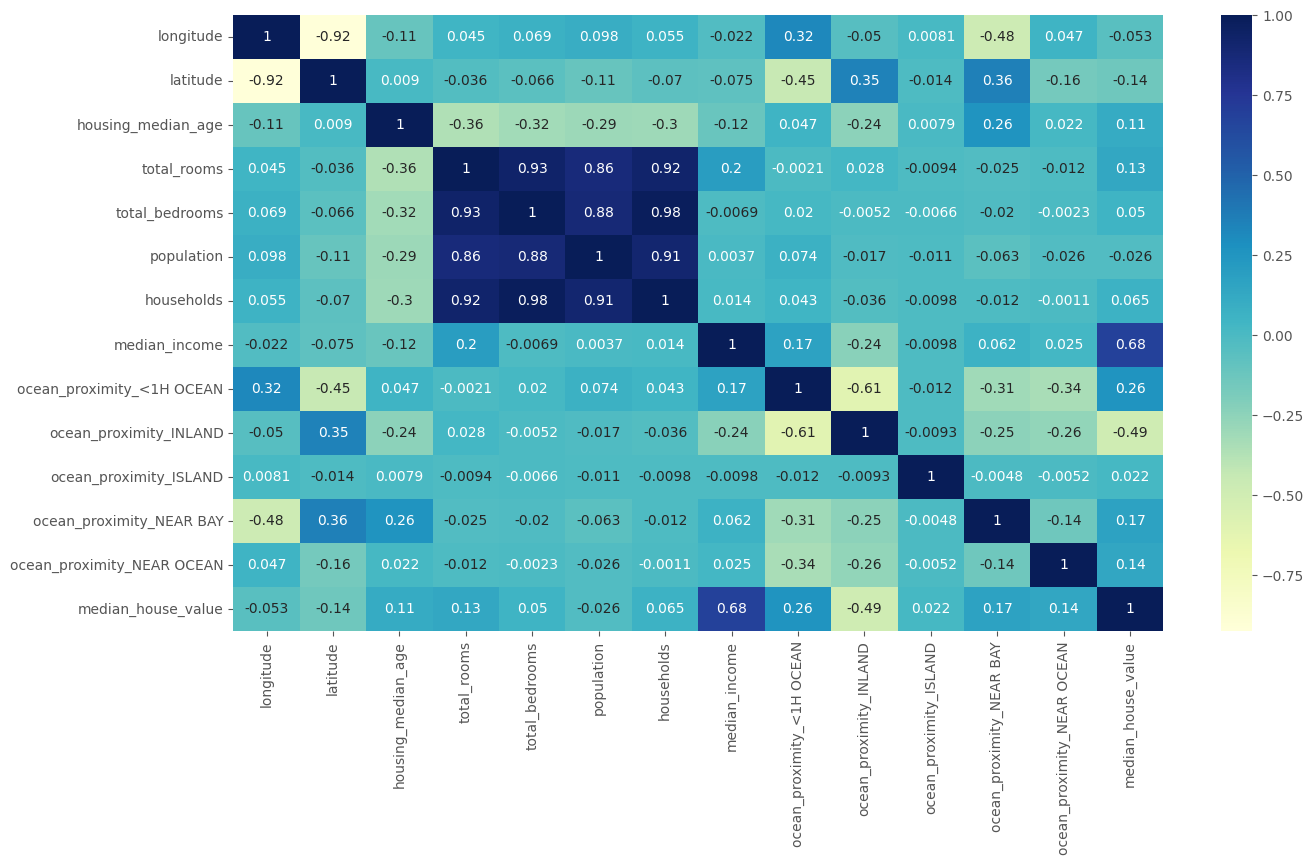

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

## Data Preprocessing


In [16]:
train_data["total_rooms"] = np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"]+1)
train_data["population"] = np.log(train_data["population"]+1)
train_data["households"] = np.log(train_data["households"]+1)


<Axes: xlabel='latitude', ylabel='longitude'>

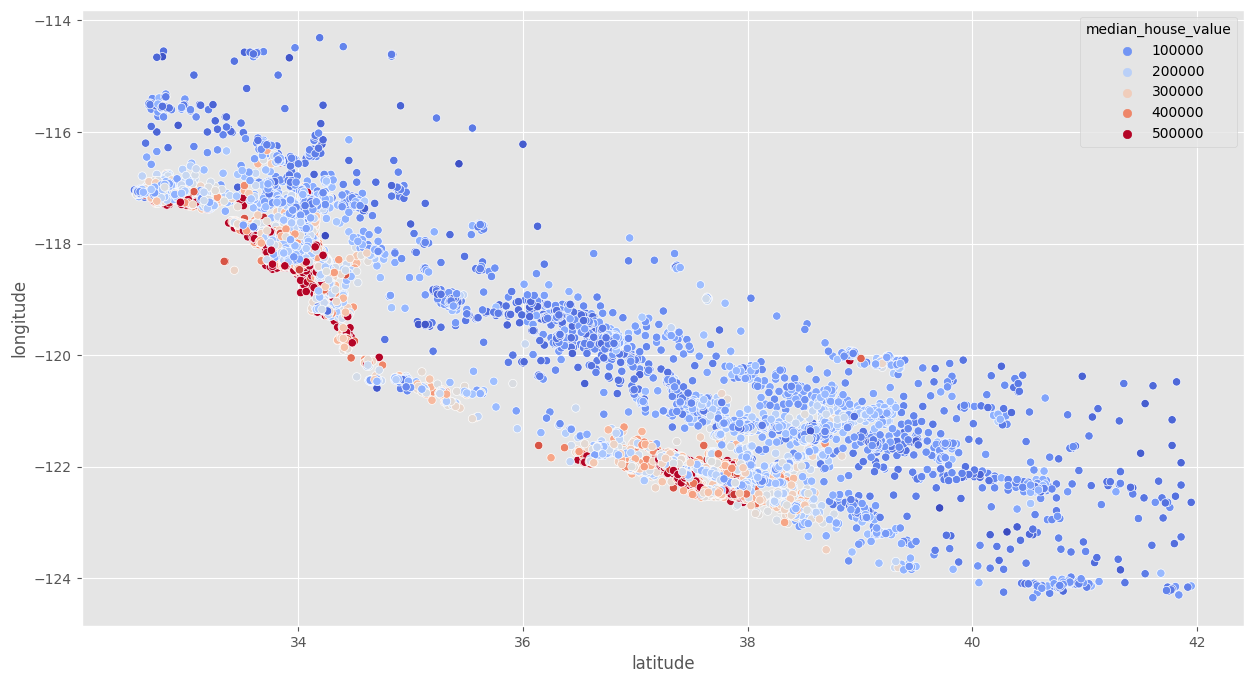

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data["latitude"], y=train_data["longitude"], 
                data=train_data, hue="median_house_value", palette="coolwarm")

## Feature Engineering

In [18]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["households_room"] = train_data["total_rooms"] / train_data["households"]

<Axes: >

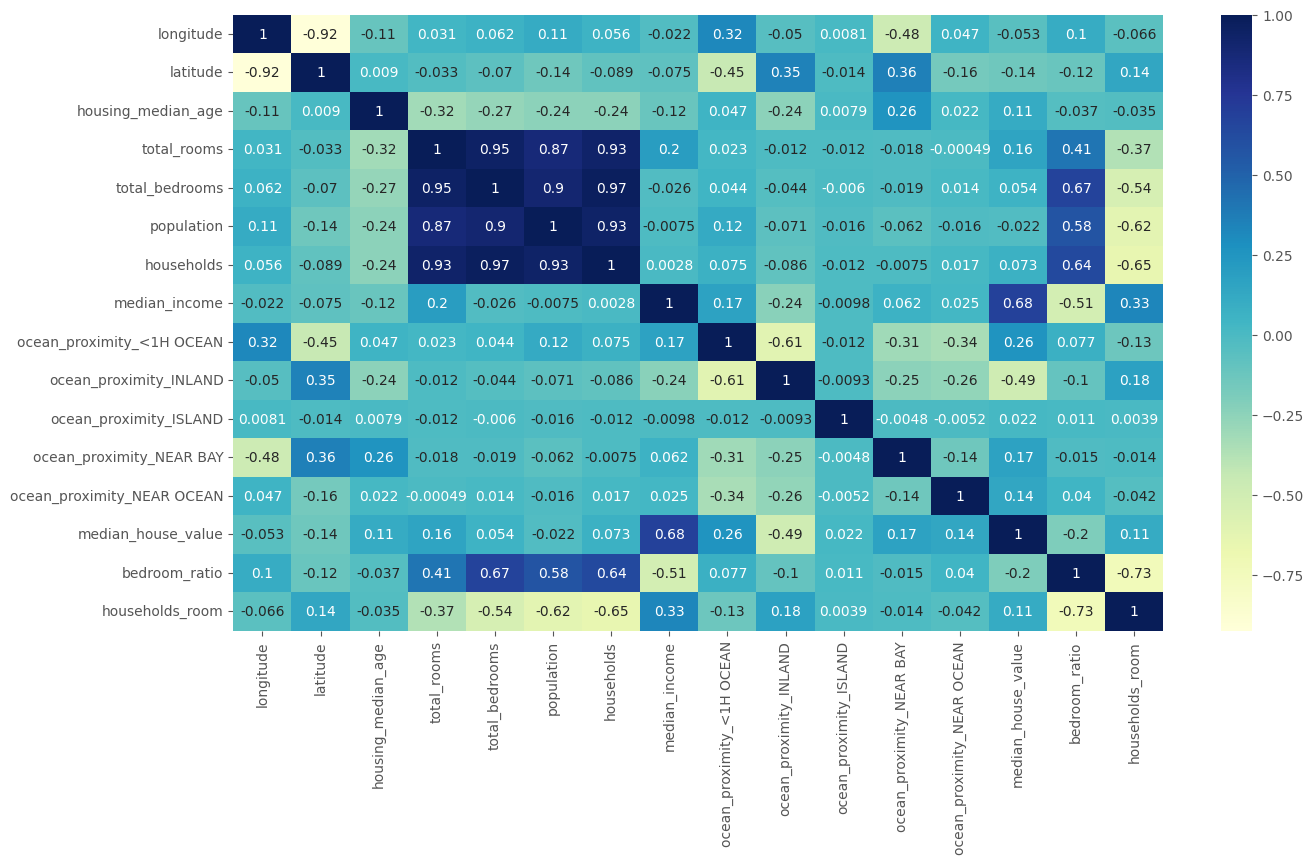

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr() , annot=True , cmap="YlGnBu")

## Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

x_train , y_train = train_data.drop(["median_house_value"] , axis=1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(x_train , y_train)

LinearRegression()

In [23]:
test_data = x_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"]+1)
test_data["population"] = np.log(test_data["population"]+1)
test_data["households"] = np.log(test_data["households"]+1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["households_room"] = test_data["total_rooms"] / test_data["households"]

x_test , y_test = test_data.drop(["median_house_value"] , axis=1), test_data["median_house_value"]


In [24]:
reg.score(x_test , y_test)

0.665272673689026

## Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [27]:
forest.score(x_test, y_test)

0.8188173830412954

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor() 

param_grid = {
  "n_estimators": [100, 200, 300],
  "min_samples_split": [2, 4],
  "max_depth": [None , 4 , 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(x_train, y_train)

In [30]:
best_forest = grid_search.best_estimator_

In [31]:
best_forest.score(x_test , y_test)

0.8187308971766317